# Lending Club Study 

#### Objective : Identify the driving factors behind loan default in a Digital Lending Organization.The data point will help the organization to make risk assessment while processing loan applications and aid to build customized loan portfolio.


In [1]:
#Import Needed Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
#Ignore Future Warnings

import warnings
warnings.filterwarnings("ignore")

#Enable setting to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Laod the dataset

df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
#Analyze the Dataset

df.info (verbose=True,null_counts=True)

#understand the dataset and Identify columns to drop : Duplicate Columns, Null Value, Columns which do not make value to the analysis using the value_counts() function


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [4]:
# Drop Columns which is all null values

df.dropna(axis=1,how='all',inplace=True)


In [5]:

#Verify after drop
df.shape
df.info (verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
#List missing Value Rows
df.isnull().sum(axis=1)

#List missing Value Columns.pub_rec_bankruptcies has high number of missing values.is it a concern.Lets check it
df.isnull().sum(axis=0)
df['pub_rec_bankruptcies'].value_counts()

#Let us fill missing values
df['pub_rec_bankruptcies'].fillna(0,inplace=True)
df['last_pymnt_d'].fillna(0,inplace=True)

#Verify
df.isnull().sum(axis=0)
df.isnull().sum(axis=1)

df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
#Data Cleanup
#Drop Duplicate columns and columns which does not help in the analysis
df = df.drop(['id','loan_amnt','grade','sub_grade','url','desc','zip_code','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','pymnt_plan','initial_list_status','out_prncp','total_pymnt','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','title','out_prncp_inv','revol_bal','revol_util'],axis=1)
df = df[~(df['emp_length'].isnull())]
df = df[~(df['emp_title'].isnull())]

In [8]:
#Verify after the Drop
df.shape
df['emp_title'].head(3)

1                       Ryder
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [9]:
##Convert Data Type of the Columns for Processing
df.round(2)
df.loan_status.apply(str)
df.verification_status.astype(str)

df['int_rate'] = df['int_rate'].astype(str)
df['int_rate'] = df['int_rate'].str.replace('%',"")

df['term'] = df['term'].astype(str)
df['term'] = df['term'].str.replace("months","")

df['emp_length'] = df['emp_length'].astype(str)
df['emp_length'] = df['emp_length'].str.replace(r'(\s<|< |years|year)',"",regex=True)
df['emp_length'] = df['emp_length'].str.replace("+","")


In [10]:
df['emp_title'].head(3)

1                       Ryder
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [11]:
#Convert Data Type of the Columns for Processing - Contd

df['term'] = df['term'].astype(int)
df['int_rate'] = df['int_rate'].astype(float)
df['emp_length'] = df['emp_length'].astype(int)

 
df[['emp_title','home_ownership','verification_status']] = df[['emp_title','home_ownership','verification_status']].astype(str)


df['issue_d'] = pd.to_datetime(df.issue_d.str.upper(), format='%b-%y', yearfirst=False)
df['last_pymnt_d'] = pd.to_datetime(df.last_pymnt_d.str.upper(), format='%b-%y', yearfirst=False)
df['last_credit_pull_d'] = pd.to_datetime(df.last_credit_pull_d.str.upper(), format='%b-%y', yearfirst=False)


In [12]:
#Derived Metrics

df['issue_y'] = pd.DatetimeIndex(df["issue_d"]).year
df['last_pymnt_y'] = df['last_pymnt_d'].dt.year


In [13]:
df['delinq_2yrs'].value_counts()
df['int_rate'].describe()
df['collection_recovery_fee'].value_counts()
df['dti'].describe()
df['verification_status'] = df['verification_status'].str.replace('Source Verified','Verified')
df['verification_status'].value_counts()

Verified        21433
Not Verified    15769
Name: verification_status, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   member_id                37202 non-null  int64         
 1   funded_amnt              37202 non-null  int64         
 2   funded_amnt_inv          37202 non-null  float64       
 3   term                     37202 non-null  int32         
 4   int_rate                 37202 non-null  float64       
 5   installment              37202 non-null  float64       
 6   emp_title                37202 non-null  object        
 7   emp_length               37202 non-null  int32         
 8   home_ownership           37202 non-null  object        
 9   annual_inc               37202 non-null  float64       
 10  verification_status      37202 non-null  object        
 11  issue_d                  37202 non-null  datetime64[ns]
 12  loan_status              37202 n

In [15]:
df.head()

,member_id,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_y,last_pymnt_y
1,1314167,2500,2500.0,60,15.27,59.83,Ryder,1,RENT,30000.0,Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,4,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,2013.0
3,1277178,10000,10000.0,36,13.49,339.31,AIR RESOURCES BOARD,10,RENT,49200.0,Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,37,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,2015.0
4,1311748,3000,3000.0,60,12.69,67.79,University Medical Group,1,RENT,80000.0,Verified,2011-12-01,Current,other,OR,17.94,0,Jan-96,0,15,0,38,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,2011,2016.0
5,1311441,5000,5000.0,36,7.90,156.46,Veolia Transportaton,3,RENT,36000.0,Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,12,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,2011,2015.0
6,1304742,7000,7000.0,60,15.96,170.08,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,11,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,2011,2016.0


In [16]:
df.shape

(37202, 34)

# UniVariate Analysis

Analyze the interested variables in the dataset to derive data

In [17]:
plt.figure(figsize=[8,6])
plt.show()

<Figure size 576x432 with 0 Axes>

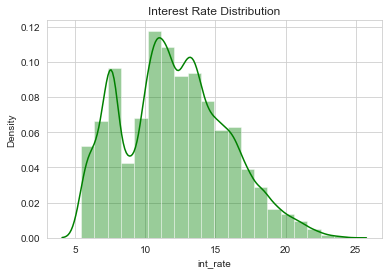

In [18]:
#Describe the Interest Rate Distribution
sns.set_style("whitegrid")
sns.distplot(df.int_rate, bins=20, color="g")
plt.title("Interest Rate Distribution", fontsize=12)
plt.show()



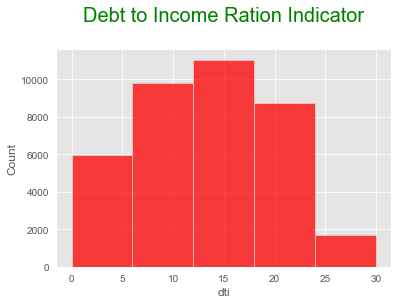

In [19]:
#Debt to Income Ratio gives an indicator for the lending organization whether the borrower has good repay capacity
plt.style.use("ggplot")
sns.histplot(df['dti'],bins=5,color='r')
plt.title("Debt to Income Ration Indicator\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


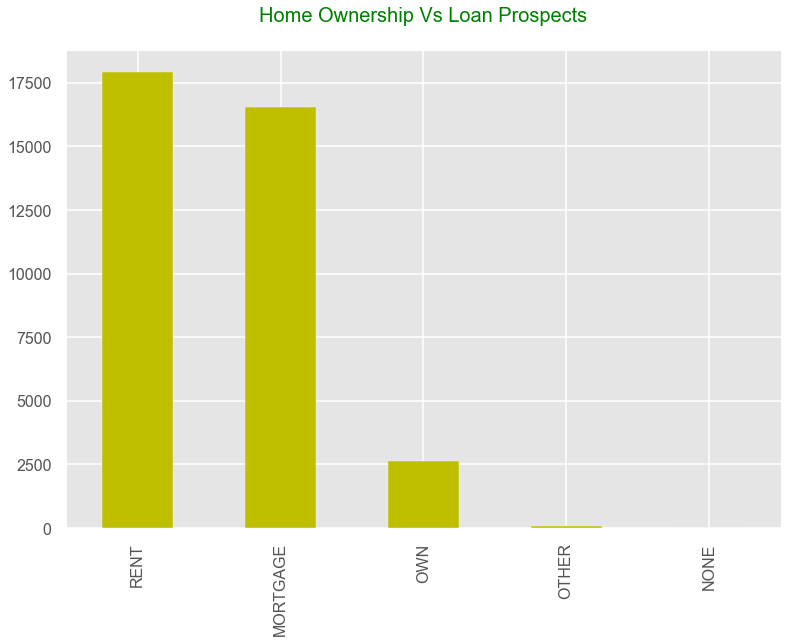

In [20]:
plt.style.use("seaborn-poster")
df['home_ownership'].value_counts().plot.bar(color='y')
plt.title("Home Ownership Vs Loan Prospects\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

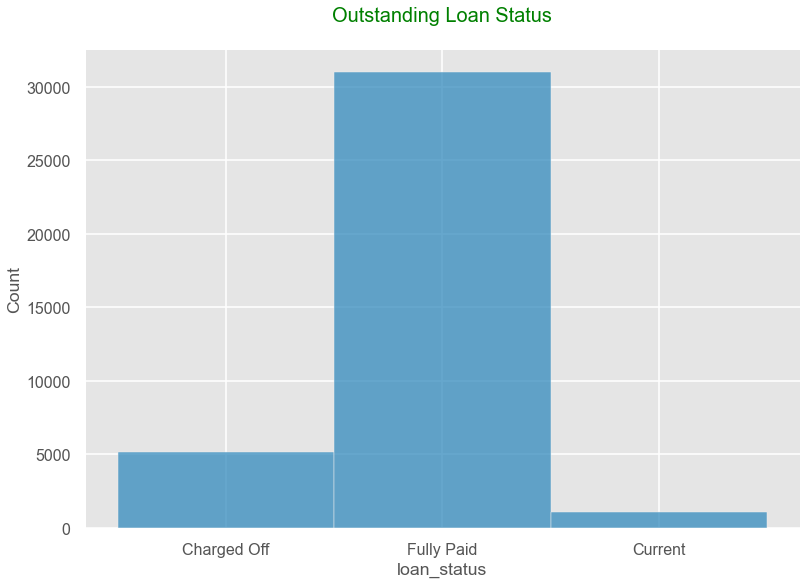

In [21]:
#OutStanding Loan Status
sns.histplot(df['loan_status'])
plt.title("Outstanding Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


# BiVariate Analysis

#Analyze The relationship between two variables in the dataset and the impact of one over the other

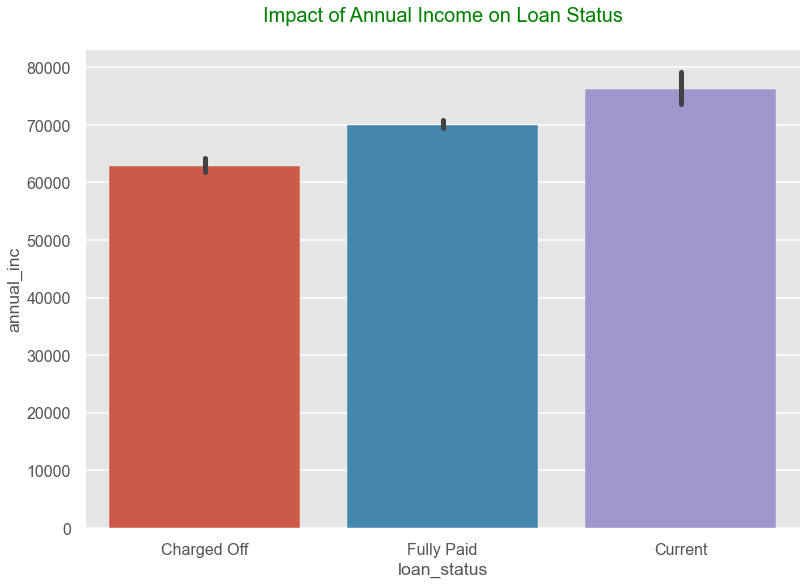

In [22]:
#Analyze the Impact of Annual Income to the loan status.

sns.barplot(df['loan_status'],df['annual_inc'])
plt.title("Impact of Annual Income on Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

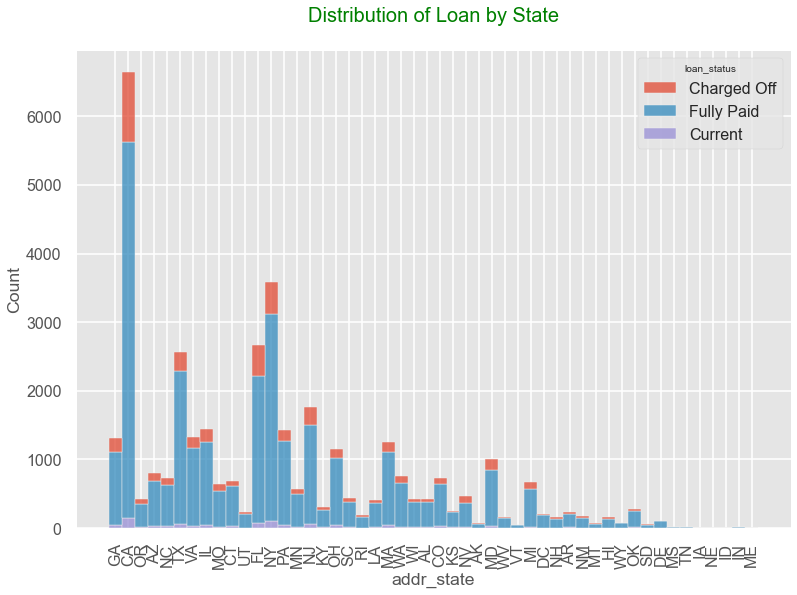

In [23]:
#Loan status by State

sns.histplot(binwidth=1, x="addr_state", hue="loan_status", data=df, stat="count", multiple="stack")
plt.title("Distribution of Loan by State\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

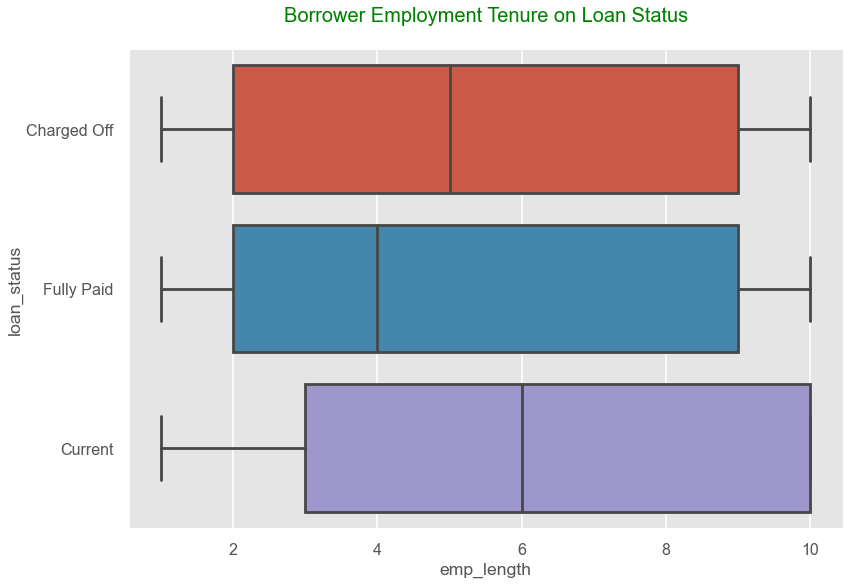

In [24]:
#Borrower Tenure vs the loan closure 

sns.boxplot(df['emp_length'],df['loan_status'])
plt.title("Borrower Employment Tenure on Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

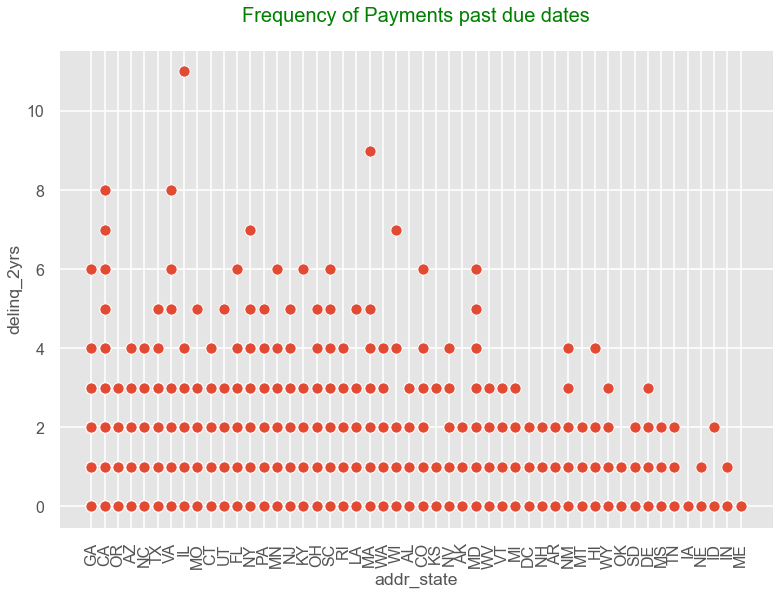

In [25]:
#Default payments by state

sns.scatterplot(x = 'addr_state', y = 'delinq_2yrs', data = df)
plt.title("Frequency of Payments past due dates\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

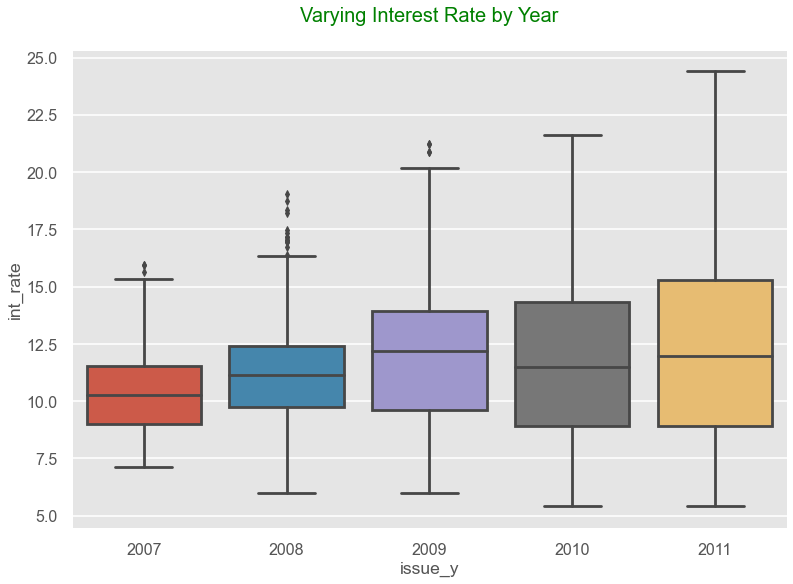

In [26]:
#Varying Interest by Year

sns.boxplot(y='int_rate', x='issue_y', data =df)
plt.title("Varying Interest Rate by Year\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

# Segment Analysis

In [27]:
#Extract the Charged off segment for further Analysis
df1 = df[df['loan_status'].str.contains('Charged Off')]
df1.shape

(5131, 34)

In [28]:
df1.head(20)

,member_id,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_y,last_pymnt_y
1,1314167,2500,2500.0,60,15.27,59.83,Ryder,1,RENT,30000.0,Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,4,1008.71,456.46,435.17,0.000000,117.08,1.1100,2013-04-01,119.66,2013-09-01,0.0,2011,2013.0
9,1306721,5375,5350.0,60,12.69,121.45,Starbucks,1,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,0,Sep-04,0,2,0,3,1469.34,673.48,533.42,0.000000,269.29,2.5200,2012-11-01,121.45,2013-03-01,0.0,2011,2012.0
12,1298717,9000,9000.0,36,13.49,305.38,Va. Dept of Conservation/Recreation,1,RENT,30000.0,Verified,2011-12-01,Charged Off,debt_consolidation,VA,10.08,0,Apr-04,1,4,0,9,2270.70,1256.14,570.26,0.000000,444.30,4.1600,2012-07-01,305.38,2012-11-01,0.0,2011,2012.0
14,1303503,10000,10000.0,36,10.65,325.74,SFMTA,3,RENT,100000.0,Verified,2011-12-01,Charged Off,other,CA,7.06,0,May-91,2,14,0,29,7471.99,5433.47,1393.42,0.000000,645.10,6.3145,2013-10-01,325.74,2014-03-01,0.0,2011,2013.0
21,1269083,21000,21000.0,36,12.42,701.73,Osram Sylvania,10,RENT,105000.0,Verified,2011-12-01,Charged Off,debt_consolidation,FL,13.22,0,Feb-83,0,7,0,38,14025.40,10694.96,3330.44,0.000000,0.00,0.0000,2013-09-01,701.73,2016-05-01,0.0,2011,2013.0
24,1304634,6000,6000.0,36,11.71,198.46,bmg-educational,1,RENT,76000.0,Not Verified,2011-12-01,Charged Off,major_purchase,CA,2.40,0,Jun-01,1,7,0,7,2050.14,1305.58,475.25,0.000000,269.31,2.5700,2012-10-01,198.46,2013-03-01,0.0,2011,2012.0
26,1304679,15000,8725.0,36,14.27,514.64,nyc transit,9,RENT,60000.0,Not Verified,2011-12-01,Charged Off,debt_consolidation,NY,15.22,0,Oct-03,1,7,0,11,0.00,0.00,0.00,0.000000,0.00,0.0000,NaT,0.00,2016-05-01,0.0,2011,NaN
27,1304764,5000,5000.0,60,16.77,123.65,Frito Lay,2,RENT,50004.0,Not Verified,2011-12-01,Charged Off,other,PA,13.97,3,Oct-03,0,14,0,22,1609.12,629.05,719.11,0.000000,260.96,2.3000,2012-12-01,123.65,2013-05-01,0.0,2011,2012.0
46,1304521,5000,5000.0,36,8.90,158.77,STERIS Corporation,10,MORTGAGE,100000.0,Verified,2011-12-01,Charged Off,debt_consolidation,OH,16.33,0,Jun-95,0,17,0,35,5021.37,4217.38,696.99,0.000000,107.00,1.0700,2014-08-01,158.77,2014-12-01,0.0,2011,2014.0
50,1304123,15000,15000.0,36,9.91,483.38,Caterpillar Inc.,8,MORTGAGE,80000.0,Not Verified,2011-12-01,Charged Off,debt_consolidation,IL,9.12,0,Apr-92,2,9,0,28,16177.77,13556.45,2374.34,24.170000,222.81,36.3708,2014-10-01,483.38,2015-03-01,0.0,2011,2014.0


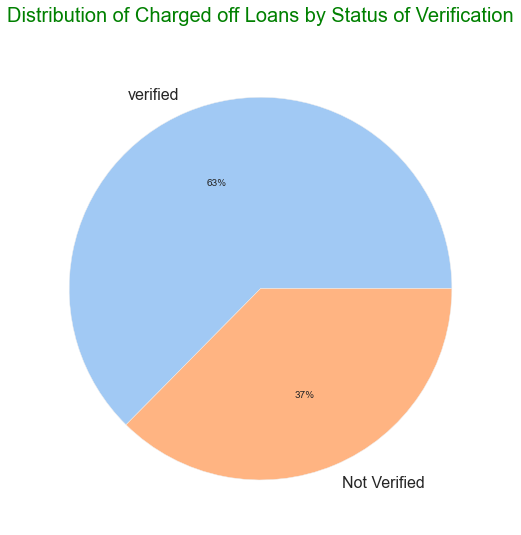

In [29]:
#Distribution of Charged off Loans by Status of Verification

dfx=df1['verification_status'].value_counts()

colors = sns.color_palette('pastel')[0:5]
labels = ['verified','Not Verified']

#create pie chart
plt.pie(dfx, labels= labels,colors = colors, autopct='%.0f%%')
plt.title("Distribution of Charged off Loans by Status of Verification\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

In [30]:
df0 = df1[['funded_amnt','int_rate','dti','issue_y']]
df0.head()

,funded_amnt,int_rate,dti,issue_y
1,2500,15.27,1.00,2011
9,5375,12.69,18.08,2011
12,9000,13.49,10.08,2011
14,10000,10.65,7.06,2011
21,21000,12.42,13.22,2011


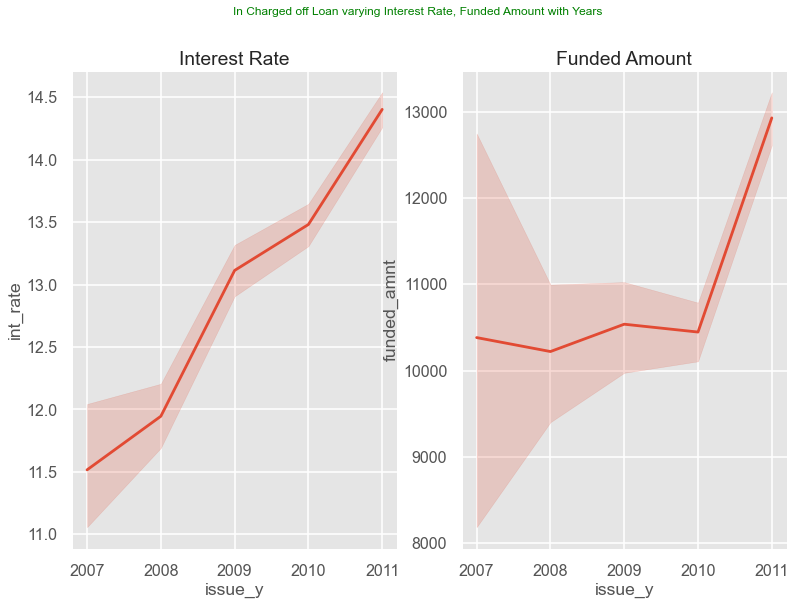

In [41]:
fig, axes = plt.subplots(1, 2)

sns.lineplot(x = 'issue_y', y = 'int_rate',data = df0, ax = axes[0])
sns.lineplot(x = 'issue_y', y = 'funded_amnt',data = df0, ax = axes[1])

axes[0].set_title("Interest Rate")
axes[1].set_title("Funded Amount")
plt.suptitle("In Charged off Loan varying Interest Rate, Funded Amount with Years\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
#plt.suptitle("In Charged off Loan varying Interest Rate, Funded Amount with Years")
plt.show()

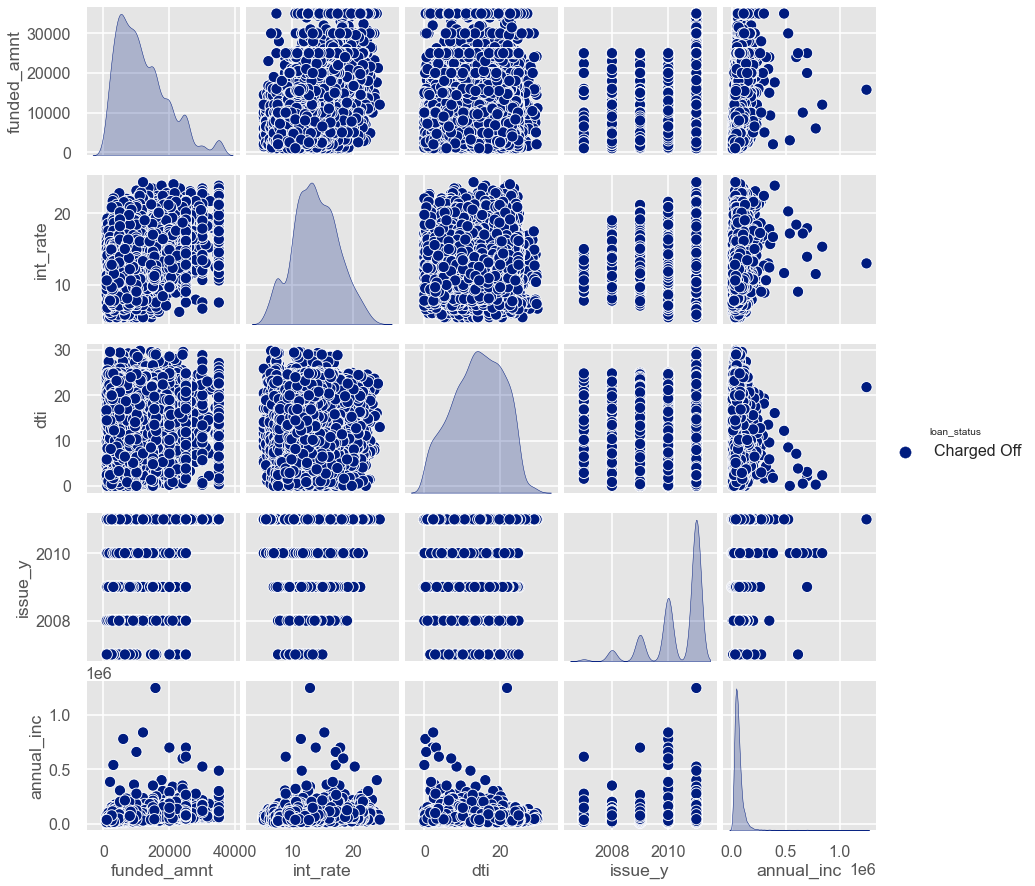

In [50]:
#Pair Plot for Charged off Loan against other variables

dfy = df1[['funded_amnt','int_rate','dti','issue_y','annual_inc','loan_status']]
sns.pairplot(dfy,hue='loan_status',palette='dark')
plt.show()